# Custom colormaps

Let's start by looking at a built-in `matplotlib` colormap, the default one called "viridis":

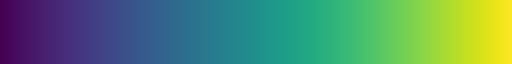

In [1]:
import numpy as np
from matplotlib import colormaps as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis')
viridis

This is a `ListedColormap`. We can get an RGBA color (i.e. red, green, blue, alpha, where alpha is opacity) for a particular value &mdash; based on the range (0, 1):

In [2]:
viridis(0.56)

(np.float64(0.120081),
 np.float64(0.622161),
 np.float64(0.534946),
 np.float64(1.0))

Or look at all the colours:

In [3]:
viridis.colors

[[0.267004, 0.004874, 0.329415],
 [0.26851, 0.009605, 0.335427],
 [0.269944, 0.014625, 0.341379],
 [0.271305, 0.019942, 0.347269],
 [0.272594, 0.025563, 0.353093],
 [0.273809, 0.031497, 0.358853],
 [0.274952, 0.037752, 0.364543],
 [0.276022, 0.044167, 0.370164],
 [0.277018, 0.050344, 0.375715],
 [0.277941, 0.056324, 0.381191],
 [0.278791, 0.062145, 0.386592],
 [0.279566, 0.067836, 0.391917],
 [0.280267, 0.073417, 0.397163],
 [0.280894, 0.078907, 0.402329],
 [0.281446, 0.08432, 0.407414],
 [0.281924, 0.089666, 0.412415],
 [0.282327, 0.094955, 0.417331],
 [0.282656, 0.100196, 0.42216],
 [0.28291, 0.105393, 0.426902],
 [0.283091, 0.110553, 0.431554],
 [0.283197, 0.11568, 0.436115],
 [0.283229, 0.120777, 0.440584],
 [0.283187, 0.125848, 0.44496],
 [0.283072, 0.130895, 0.449241],
 [0.282884, 0.13592, 0.453427],
 [0.282623, 0.140926, 0.457517],
 [0.28229, 0.145912, 0.46151],
 [0.281887, 0.150881, 0.465405],
 [0.281412, 0.155834, 0.469201],
 [0.280868, 0.160771, 0.472899],
 [0.280255, 0.16569

## Under, over and bad

You may not know that colormaps have some special values, allowing us to highlight bad values, as well as values that are under or over the ends of the colormap.

Let's set them.

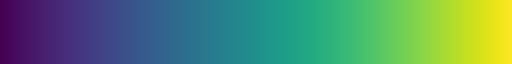

In [4]:
viridis_mod = cm.get_cmap('viridis')

viridis_mod.set_under(color='cyan')
viridis_mod.set_bad(color='red')
viridis_mod.set_over(color='white')
viridis_mod

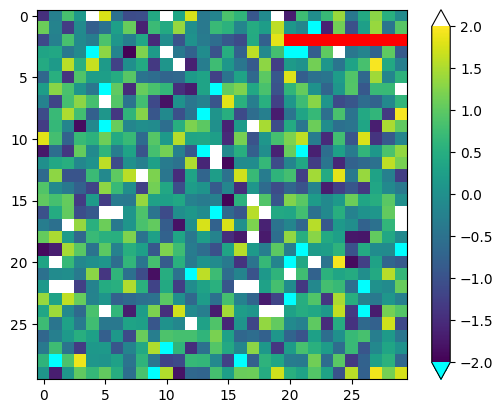

In [5]:
import matplotlib.pyplot as plt

# Make some Gaussian noise.
data = np.random.randn(30, 30)

# Add some 'bad' pixels.
data[2, -10:] = np.nan

# Plot with modified colormap.
plt.imshow(data, cmap=viridis_mod, vmin=-2, vmax=2)
plt.colorbar(extend='both')

## Modify viridis

I want to add a band of pink to the viridis colormap, to highlight some range of values. I'll do it in three steps:

1. Get the colours for viridis as an array.
2. Modify the array.
3. Save the array as a colourmap.

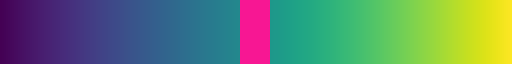

In [11]:
colours = viridis(np.linspace(0, 1, 256))

pink = np.array([248/256, 24/256, 148/256, 1])
colours[120:135, :] = pink

viridis_band = ListedColormap(colours)
viridis_band

Now we can try it out!

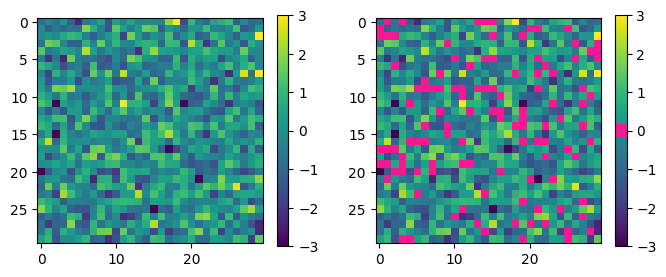

In [12]:
cms = [viridis, viridis_band]

data = np.random.randn(30, 30)

fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
for ax, cmap in zip(axs, cms):
    im = ax.imshow(data, cmap=cmap, vmin=-3, vmax=3)
    cb = fig.colorbar(im)
plt.show()

## Make a new ramp as `LinearSegmentedColormap`

We can also make a new colourmap from scratch.

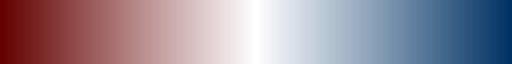

In [28]:
# Channel:  RED    GREEN     BLUE  ALPHA
red =   [100/256,   0/256,   0/256, 1.0]
white = [256/256, 256/256, 256/256, 1.0]
blue =  [  0/256,  50/256, 100/256, 1.0]

red_blue = LinearSegmentedColormap.from_list("red_blue", [red, white, blue])
red_blue

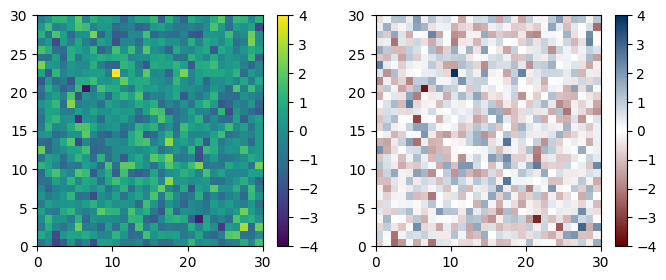

In [27]:
cms = [viridis, red_blue]

data = np.random.randn(30, 30)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
for ax, cmap in zip(axs, cms):
    im = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
    fig.colorbar(im)
plt.show()

Look up colours in a `LinearSegmentedColormap`...

In [19]:
red_blue(0.5)

(np.float64(0.996078431372549),
 np.float64(0.996844362745098),
 np.float64(0.997610294117647),
 np.float64(1.0))

## Extract colours from an image

If you have an image, you can try to recover a colourmap from it with my [`unmap`](https://scienxlab.org/unmap/readme.html) library.

If you have an image of a colourmap, eg cropped from a visualization, you can probably grab a 1D array of pixels from it then do something like (where `...` represents the indexing you need to get an array of pixels).

    LinearSegmentedColormap.from_list("my_cmap", arr[...])

## Save as QGIS format

You can save a `matplotlib` colormap in a format QGIS using the code in [this gist](https://gist.github.com/kwinkunks/75c376a8299c4d66b28f91b8989ab190).

<hr />

© 2025 Matt Hall, licensed CC BY